# (A)Car_views_image_dataset

# 1.Import Libraries

In [48]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt


# 2.Image data generator - data preprocessing


In [49]:
IMAGE_SIZE=224
BATCH_SIZE=64

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

In [50]:
train="training"
train_genarator=train_datagen.flow_from_directory(
    train,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    

) 
test="validation"
validation_generator=validation_datagen.flow_from_directory(
    test,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    

) 
    


Found 960 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


In [51]:
print("Integer values of classes:")
train_genarator.class_indices

Integer values of classes:


{'front': 0, 'rear': 1, 'side': 2}

# 3.VGG16 model

In [52]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
vgg.output


<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [53]:
for layer in vgg.layers:
    layer.trainable=False
    

In [54]:
x=Flatten()(vgg.output)
prediction=Dense(3,activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

# 4.Train the model

In [55]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [56]:
model.save("train1.h5")
fn11='log3.csv'
history_logger=tf.keras.callbacks.CSVLogger(fn11,separator=",",append=True)

In [91]:
epoch=10

history=model.fit(train_genarator,
                  steps_per_epoch=len(train_genarator),
                  epochs=epoch,
                  callbacks=[history_logger],
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

Epoch 1/10
15/15 [==============================] - 207s 14s/step - loss: 1.2044 - accuracy: 0.4719 - val_loss: 1.0337 - val_accuracy: 0.5439
Epoch 2/10
15/15 [==============================] - 209s 14s/step - loss: 0.7366 - accuracy: 0.6917 - val_loss: 0.8314 - val_accuracy: 0.6140
Epoch 3/10
15/15 [==============================] - 213s 14s/step - loss: 0.5640 - accuracy: 0.7698 - val_loss: 0.7691 - val_accuracy: 0.6784
Epoch 4/10
15/15 [==============================] - 215s 14s/step - loss: 0.5311 - accuracy: 0.8000 - val_loss: 0.7791 - val_accuracy: 0.6959
Epoch 5/10
15/15 [==============================] - 219s 15s/step - loss: 0.4321 - accuracy: 0.8458 - val_loss: 0.7512 - val_accuracy: 0.6901
Epoch 6/10
15/15 [==============================] - 223s 15s/step - loss: 0.4082 - accuracy: 0.8490 - val_loss: 0.7859 - val_accuracy: 0.6901
Epoch 7/10
15/15 [==============================] - 224s 15s/step - loss: 0.3584 - accuracy: 0.8813 - val_loss: 0.7372 - val_accuracy: 0.6901
Epoch 

# Model accuracy

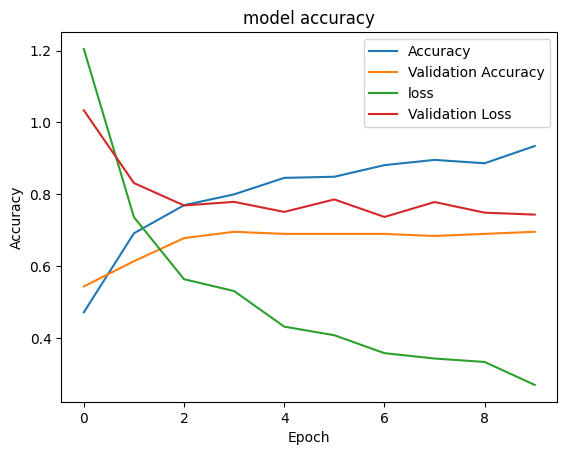

In [92]:

plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()




# 5.Test the model

# Test_Image1

1/1 [==============================] - 0s 251ms/step
[[1.0000000e+00 3.6214376e-26 1.2078510e-30]]

VIEW OF THE CAR IMAGE:
front image


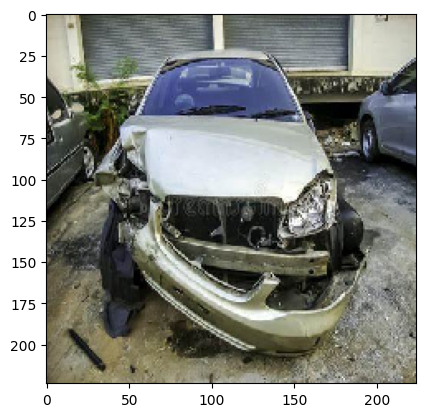

In [120]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
from tensorflow import keras
model1=keras.models.load_model("train1.h5")
img_pred=load_img("test/frontside.jpg",target_size=(224,224))
plt.imshow(img_pred, cmap=plt.get_cmap('gray'))

img_pred=img_to_array(img_pred)

img_pred=np.expand_dims(img_pred, axis=0)

rslt= model1.predict(img_pred)

print(rslt)
print()
if rslt[0][0]>rslt[0][1]:
    if rslt[0][2]>rslt[0][0]:
        prediction="side image"
    else:   
        prediction="front image"
    
else:
    prediction="rear image"
print("VIEW OF THE CAR IMAGE:")
print(prediction)

# (B)Damage_level_Image_dataset


# 1.Preprocessing

In [57]:
IMAGE_SIZE_damage=224
BATCH_SIZE_damage=32
train_datagen_damage=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

validation_datagen_damage=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

In [58]:
train_damage="training_damage"
train_generator_damage=train_datagen_damage.flow_from_directory(
    train_damage,
    target_size=(IMAGE_SIZE_damage,IMAGE_SIZE_damage),
    batch_size=BATCH_SIZE_damage
    

) 
test_damage="validation_damage"
validation_generator_damage=validation_datagen_damage.flow_from_directory(
    test_damage,
    target_size=(IMAGE_SIZE_damage,IMAGE_SIZE_damage),
    batch_size=BATCH_SIZE_damage
) 

Found 571 images belonging to 3 classes.
Found 35 images belonging to 3 classes.


In [59]:
print("Integer values of classes:")
train_generator_damage.class_indices

Integer values of classes:


{'high': 0, 'low': 1, 'severe': 2}

# 2.VGG16 model

In [60]:
IMAGE_SIZE_damage=[224,224]
vgg_damage=VGG16(input_shape=IMAGE_SIZE_damage+[3],weights='imagenet',include_top=False)
vgg_damage.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [61]:
for layer_d in vgg_damage.layers:
    layer_d.trainable=False

In [62]:
x_d=Flatten()(vgg_damage.output)
prediction_damage=Dense(3,activation='softmax')(x_d)
model_damage=Model(inputs=vgg_damage.input,outputs=prediction_damage)
model_damage.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [63]:
model_damage.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
model_damage.save("train2.h5")
fn12='log1.csv'
logger=tf.keras.callbacks.CSVLogger(fn12,separator=",",append=True)

# 3.Train the model

In [77]:
epoch_d=7
history_damage=model_damage.fit(train_generator_damage,
                  steps_per_epoch=len(train_generator_damage),
                  epochs=epoch_d,
                  callbacks=[logger],
                  validation_data=validation_generator_damage,
                  validation_steps=len(validation_generator_damage)
                 )

Epoch 1/7
18/18 [==============================] - 107s 6s/step - loss: 1.1776 - accuracy: 0.5989 - val_loss: 1.3002 - val_accuracy: 0.5714
Epoch 2/7
18/18 [==============================] - 114s 6s/step - loss: 0.6921 - accuracy: 0.7250 - val_loss: 0.8449 - val_accuracy: 0.5714
Epoch 3/7
18/18 [==============================] - 111s 6s/step - loss: 0.4477 - accuracy: 0.8179 - val_loss: 0.8123 - val_accuracy: 0.6000
Epoch 4/7
18/18 [==============================] - 115s 6s/step - loss: 0.3596 - accuracy: 0.8739 - val_loss: 0.8032 - val_accuracy: 0.6571
Epoch 5/7
18/18 [==============================] - 116s 6s/step - loss: 0.2686 - accuracy: 0.9089 - val_loss: 0.8715 - val_accuracy: 0.6286
Epoch 6/7
18/18 [==============================] - 118s 7s/step - loss: 0.2571 - accuracy: 0.9159 - val_loss: 0.7941 - val_accuracy: 0.6857
Epoch 7/7
18/18 [==============================] - 119s 7s/step - loss: 0.2546 - accuracy: 0.9089 - val_loss: 1.2429 - val_accuracy: 0.6286


# Model accuracy

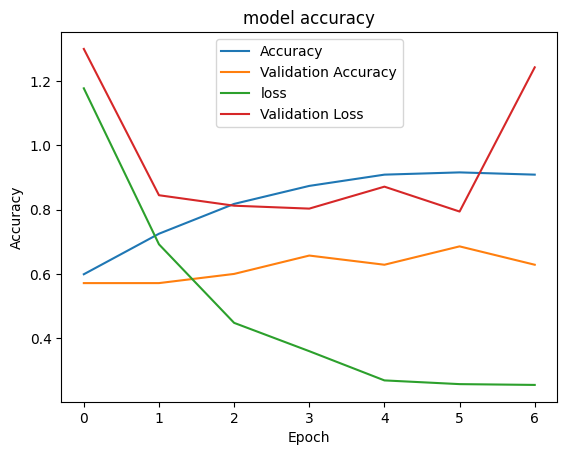

In [78]:

plt.plot(history_damage.history["accuracy"])
plt.plot(history_damage.history['val_accuracy'])
plt.plot(history_damage.history['loss'])
plt.plot(history_damage.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


# 4.Test the model


# Test a damage level


1/1 [==============================] - 0s 248ms/step
[[5.038547e-16 9.999651e-01 3.495875e-05]]

DAMAGE LEVEL:

severe damage


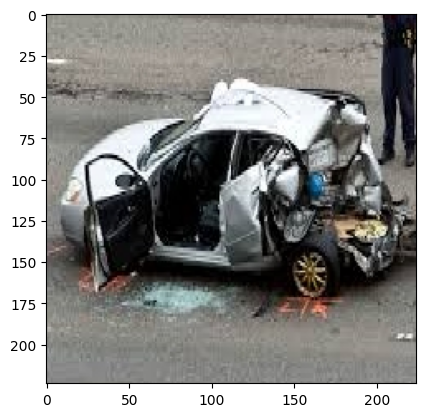

In [136]:
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow import keras
from tensorflow import keras
model2=keras.models.load_model("train2.h5")
import numpy as np
img_pred_1=load_img("test/damage2.jpg",target_size=(224,224))
plt.imshow(img_pred_1, cmap=plt.get_cmap('gray'))

img_pred_1=img_to_array(img_pred_1)
img_pred_1=np.expand_dims(img_pred_1, axis=0)

print()
rst=model2.predict(img_pred_1)

if rst[0][0]>rst[0][1]:
    if rst[0][2]>rst[0][0]:
        predicts="low damage"
    else:   
        predicts="mild damage"
    
else:
    predicts="severe damage"

print(rst)
print()
print("DAMAGE LEVEL:")
print()
print(predicts)


# New section --- Test both views and damage level of the car

1/1 [==============================] - 0s 323ms/step
[[0.0000000e+00 1.1339023e-35 1.0000000e+00]]

VIEW OF THE CAR IMAGE:
rear image
__________________

1/1 [==============================] - 0s 294ms/step
[[1.5054704e-17 7.2161237e-07 9.9999928e-01]]

DAMAGE LEVEL:
low damage


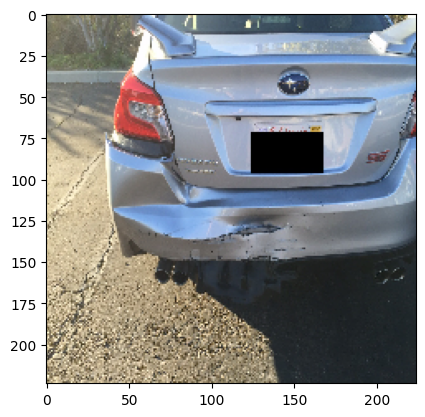

In [65]:
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow import keras
pred1=load_img("test/backside.jpg",target_size=(224,224))
plt.imshow(pred1, cmap=plt.get_cmap('gray'))
#load model
from tensorflow import keras
model3=keras.models.load_model("train1.h5")
from tensorflow import keras
model4=keras.models.load_model("train2.h5")

pred1=img_to_array(pred1)

pred1=np.expand_dims(pred1, axis=0)

result1= model3.predict(pred1)

print(result1)
print("")
if result1[0][0]>result1[0][1]:
    if result1[0][2]>result1[0][0]:
        prediction="side image"
        class_views=2
    else:   
        prediction="front image"
        class_views=0
    
else:
    prediction="rear image"
    class_views=1
print("VIEW OF THE CAR IMAGE:")
print(prediction)
print("__________________")
print()
result2=model4.predict(pred1)

if result2[0][0]>result2[0][1]:
    if result2[0][2]>result2[0][0]:
        predict="severe damage"
        class_damage=2
    else:   
        predict="mild damage"
        class_damage=1
    
else:
    predict="low damage"
    class_damage=0

print(result2)
print()
print("DAMAGE LEVEL:")
print(predict)

# (c)Premium amount calculation


In [74]:
#class_view{0:front,1:rear,2:side}
#class_damage(0:low,1:mild,2:high)

#function---depreciation and IDV
def calcidv(r,v,d):
    if(d==0):
        if(v==0):
            d_dep=0.5*r
        elif(v==1):
            d_dep=0.07*r
        else:
            d_dep=0.06*r
    elif(d==1):
        if(v==0):
            d_dep=0.12*r
        elif(v==0):
            d_dep=0.14*r
        else:
            d_dep=0.15*r
    elif(d==2):
        if(v==0):
            d_dep=0.17*r
        elif(v==1):
            d_dep=0.18*r
        else:
            d_dep=0.20*r
    print("DEPRECIATION_RATE ",d_dep)
    idv_idv=r-d_dep
    print("IDV ",idv_idv)
    return idv_idv
    

#funtion------price           
def calculate(c,m,e,f):
    if(model=="tata" and m=="tiago"):
        price=649000
        return price
    else:
        if(f=="cng"):
            price=296661
            return price
        else:
            price=292667
            return price
    if(c=="renault" and m=="triber"):
        price=559000
        return price
    else:
        if(e==999):
            price=470990
            return price
        else:
            price=413290
            return price
    if(c=="dutsan" and m=="go"):
        price=528464
        return price
    else:
        if(e==999):
            price=43765
            return price
        else:
            price=351832
            return price
    if(c=="hyndai" and f=="cng"):
        price=547990
        return price
    else:
        price=503990
        return price
    return

#function-----premium amount calculator
def calculator(i):
    print("TOTAL PREMIUM AMOUNT:")
    own_damage=0.01970*i
    ncb_discount=0.2*own_damage
    od_premium=own_damage-ncb_discount
    net_premium=od_premium+100+50+1110
    gst=0.16*net_premium
    premium=gst+net_premium
    print("premium amount",premium)
    return premium
    
#----------mainfunction---------

#---------variables------------
models=["tiago","nano_genx","triber","kwid","go","redi_go","santro"]
dictc={"tata":("tiago","nano genx"),"renault":("triber","kwid"),"datsun":("go","redi_go"),"hyndai":("santro")}
dengine={"tiago":("1199"),"nano":("624"), "kwid": ("999","799"), "triber":("999"), "go":("1198"),"redi":("999","799"),"santro":("1086")}
#fuel type
cng={"nano_genx","santro",""}

#------getting input from user--------
print("Enter car details:")
cmp_name=input()
model=input()
engine=str(input())
fuel_type=input()
verify=0

#-----------verfication--entered company and other details were real-----------------
#----------function calling-----------------------
if cmp_name in dictc.keys():
    l=list(dictc[cmp_name])
    verify+=1
    if model in l:
        if(dengine[model]=="kwid"):
            l_eng=list(dengine[model])
        else:
            l_eng=str(dengine[model])
        verify+=1
        if engine in l_eng:
            verify+=1
            if fuel_type=="cng":
                if model in cng:
                    verify+=1
                    print("verified")
                    rate=calculate(cmp_name,model,engine,fuel_type)
                    print("PRICE OF THE CAR:",rate)
                    idv=calcidv(rate,class_view,class_damage)
                    premium=calculator(idv)
                    
            else:
                verify+=1
                print("")
                rate=calculate(cmp_name,model,engine,fuel_type)
                print("PRICE OF THE CAR:",rate)
                idv=calcidv(rate,class_views,class_damage)
                premium=calculator(idv)
        else:
            print("please enter the valid engine capacity")
    else:
        print("please enter the valid model name")
else:
    print("sorry!! <<<your car comany detail is not available....We will come up with upgraded version ASP!!!>>>")
if(verify<4):
    print("^_^..............terminated...................^_^")


Enter car details:
tata
tiago
1199
petrol

PRICE OF THE CAR: 292667
DEPRECIATION_RATE  58533.4
IDV  234133.6
TOTAL PREMIUM AMOUNT:
premium amount 5741.93682176
